# <span style='color:#009999'> <span style='font-family:serif'> <font size="15"> **Tutorial Notebook for Ocean Sciences Meeting (2022)**
    
    
<img src="img/llc4320_diagram.png" alt="drawing" width="1500"/>    
 

    
## NOTES
    
    
<font size="3">This notebook is demonstrates the workflow to use the <span style='background-color:#FFE5CC'> <span style='color:#330066'> **LLC4320**<span style='background-color:white'> <span style='color:Black'> data available on the Johns Hopkins University's [SciServer](https://www.sciserver.org/) Portal. The basic elements of this tutorial is to demonstrate 
    
 1. <span style='color:#ff6666'><font size="5"> **Scalability** <font size="3"><span style='color:Black'> of the code. Having seen the features that [Oceanspy](https://oceanspy.readthedocs.io/en/latest/) can produce with the ECCO dataset, we show that these can also be performed on the much larger <span style='background-color:#FFE5CC'> <span style='color:#330066'> **LLC4320**<span style='background-color:white'> <span style='color:Black'> dataset. We again produce standard repeated oceanography sections of [WOCE](http://woceatlas.ucsd.edu/) sections in the Atlantic and Pacific.
    
2. <span style='color:#ff6666'><font size="5"> **Science case examples** <font size="3"><span style='color:Black'>. The <span style='background-color:#FFE5CC'> <span style='color:#330066'> **LLC4320**<span style='background-color:white'> <span style='color:Black'> dataset is defined on a much finer grid (a fact of $\times 5$) when compared to the <span style='background-color:#FFE5CC'> <span style='color:#330066'> **ECCO**<span style='background-color:white'> <span style='color:Black'>dataset (defined on the LLC90 grid). This facilitates analysis of Regionally relevant oceanography variables such as <span style='color:#0066cc'> **relative vorticity** <span style='color:Black'> $\zeta = v_x - u_y$ and even produce maps of <span style='color:#0066cc'> **potential vorticity** <span style='color:Black'> $q = \rho_{0}^{-1}\omega\cdot\nabla\rho$
    


In [1]:
%%time
import oceanspy as ospy
import xarray as xr
import dask
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import numpy as np
from oceanspy.llc_rearrange import Dims, LLCtransformation
import warnings
warnings.filterwarnings('ignore')

CPU times: user 18.9 s, sys: 1.24 s, total: 20.1 s
Wall time: 20.2 s


In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

CPU times: user 2.57 ms, sys: 6.33 ms, total: 8.9 ms
Wall time: 5.75 ms


In [5]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 100.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41370,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 100.00 GiB
Comm: tcp://127.0.0.1:37863,Total threads: 1
Dashboard: http://127.0.0.1:43561/status,Memory: 25.00 GiB
Nanny: tcp://127.0.0.1:37389,


# <span style='color:#009999'> <span style='font-family:serif'>**Open and create ospy object from local catalog**
 
 
<font size="3"> [Oceanspy](https://oceanspy.readthedocs.io/en/latest/) uses calls a local (Intake) Catalog that points directly to where the data is stored locally, which defines the relevant parameters to create the xgcm.Grid object containing the correct grid Topology, and relabels the dimensions so that the coordinate $z$ becomes a dimension (only useful for grids in which $z\neq z(x, y)$).    
    
    



In [6]:
%%time 
od = ospy.open_oceandataset.from_catalog('LLC4320')
od._ds = od._ds.drop_vars({'k', 'k_u', 'k_p1', 'k_l'})
co_list = [var for var in od._ds.variables if "time" not in od._ds[var].dims]
od._ds = od._ds.set_coords(co_list)

Opening LLC4320.
10 day hourly data from the LLC4320 simulations computed using the MITGCM, a general, curvilinear ocean simulation on the cube-sphere.
CPU times: user 47 s, sys: 5.62 s, total: 52.6 s
Wall time: 1min 14s


# <span style='color:#009999'> <span style='font-family:serif'> **Oceanspy Object**
 
 
<font size="3">The Oceanspy object contains the several properties which can be called directly as
    
```python
dataset  = od.dataset
face_connections = od.face_connections
```


In [7]:
od.grid

<xgcm.Grid>
X Axis (not periodic, boundary=None):
  * center   X --> right
  * right    Xp1 --> center
Y Axis (not periodic, boundary=None):
  * center   Y --> right
  * right    Yp1 --> center
time Axis (not periodic, boundary=None):
  * center   time_midp --> outer
  * outer    time --> center
Z Axis (not periodic, boundary=None):
  * center   Z --> left
  * left     Zl --> center
  * outer    Zp1 --> center
  * right    Zu --> center

In [8]:
od.face_connections

{'face': {0: {'X': ((12, 'Y', False), (3, 'X', False)),
   'Y': (None, (1, 'Y', False))},
  1: {'X': ((11, 'Y', False), (4, 'X', False)),
   'Y': ((0, 'Y', False), (2, 'Y', False))},
  2: {'X': ((10, 'Y', False), (5, 'X', False)),
   'Y': ((1, 'Y', False), (6, 'X', False))},
  3: {'X': ((0, 'X', False), (9, 'Y', False)), 'Y': (None, (4, 'Y', False))},
  4: {'X': ((1, 'X', False), (8, 'Y', False)),
   'Y': ((3, 'Y', False), (5, 'Y', False))},
  5: {'X': ((2, 'X', False), (7, 'Y', False)),
   'Y': ((4, 'Y', False), (6, 'Y', False))},
  6: {'X': ((2, 'Y', False), (7, 'X', False)),
   'Y': ((5, 'Y', False), (10, 'X', False))},
  7: {'X': ((6, 'X', False), (8, 'X', False)),
   'Y': ((5, 'X', False), (10, 'Y', False))},
  8: {'X': ((7, 'X', False), (9, 'X', False)),
   'Y': ((4, 'X', False), (11, 'Y', False))},
  9: {'X': ((8, 'X', False), None), 'Y': ((3, 'X', False), (12, 'Y', False))},
  10: {'X': ((6, 'Y', False), (11, 'X', False)),
   'Y': ((7, 'Y', False), (2, 'X', False))},
  11: {'X'

## <span style='color:#009999'> <span style='font-family:serif'> **LLC4320: A large Dataset**
 
<font size="3"> In this tutorial we consider hourly data, for the first ten days of some relevant oceanographic variables, namely 
    
* <font size="3">Potential temperature <span style='color:#0066cc'> $\theta(x, y, z, t)$ <span style='color:Black'> ,
* <font size="3">salinity  <span style='color:#0066cc'> $S(x, y, z, t)$ <span style='color:Black'> ,
* <font size="3">surface height anomaly  <span style='color:#0066cc'> $\eta(x, y, t)$ <span style='color:Black'> ,
* <font size="3">zonal velocity  <span style='color:#0066cc'> $U(x, y, z, t)$ <span style='color:Black'> ,
* <font size="3">meridional velocity  <span style='color:#0066cc'> $V(x, y, z, t)$ <span style='color:Black'> , 

<font size="3">along with the relevant grid metrics.

In [9]:
od.dataset

<xarray.Dataset>
Dimensions:    (time: 240, Z: 90, Zl: 90, Zp1: 91, Zu: 90, face: 13, Y: 4320,
                X: 4320, Xp1: 4320, Yp1: 4320, time_midp: 239)
Coordinates: (12/34)
  * time       (time) datetime64[ns] 2012-04-25 ... 2012-05-04T23:00:00
  * Z          (Z) float64 -0.5 -1.57 -2.79 ... -5.882e+03 -6.301e+03 -6.76e+03
  * Zl         (Zl) float64 0.0 -1.0 -2.14 ... -5.682e+03 -6.082e+03 -6.52e+03
  * Zp1        (Zp1) float64 0.0 -1.0 -2.14 ... -6.082e+03 -6.52e+03 -7e+03
  * Zu         (Zu) float64 -1.0 -2.14 -3.44 ... -6.082e+03 -6.52e+03 -7e+03
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    ...         ...
    rA         (face, Y, X) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    rAs        (face, Yp1, X) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    rAw        (face, Y, Xp1) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    rAz        (face, Yp1, Xp1) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    rhoRef     (Z) float32 dask.array<chunksize=(1,), meta=np.ndarray>
  * time_midp  (time_midp) datetime64[ns] 2012-04-25T00:30:00 ... 2012-05-04T...
Data variables:
    Eta        (time, face, Y, X) float32 dask.array<chunksize=(1, 1, 4320, 4320), meta=np.ndarray>
    S          (time, Z, face, Y, X) float32 dask.array<chunksize=(1, 1, 1, 4320, 4320), meta=np.ndarray>
    Temp       (time, Z, face, Y, X) float32 dask.array<chunksize=(1, 1, 1, 4320, 4320), meta=np.ndarray>
    U          (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 1, 1, 4320, 4320), meta=np.ndarray>
    V          (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 1, 1, 4320, 4320), meta=np.ndarray>
    niter      (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    OceanSpy_parameters:        {'rSphere': 6371.0, 'eq_state': 'jmd95', 'rho...
    OceanSpy_name:              LLC4320
    OceanSpy_description:       10 day hourly data from the LLC4320 simulatio...
    OceanSpy_grid_coords:       {'Y': {'Y': None, 'Yp1': 0.5}, 'X': {'X': Non...
    OceanSpy_face_connections:  {'face': {0: {'X': ((12, 'Y', False), (3, 'X'...

## <span style='color:#009999'> <span style='font-family:serif'> **~84 Tb!**


In [10]:
od._ds.nbytes / 1e12

84.357855277668

# <span style='color:#009999'> <span style='font-family:serif'> **Making a Cutout**
    
<font size="3"> Sample the ocean data within a region of the world's oceans that is relevant to your project. For that need to define a set of parameters.
    
<font size="3"> **[Oceanspy](https://oceanspy.readthedocs.io/en/latest/)** returns a new ospy object of reduced size and one in which ~~<span style='background-color:White'> <span style='color:#FF6666'> ***face is no longer a dimension***<span style='background-color:white'> <span style='color:Black'>~~ . This is done without the use of interpolation so that you can still close budgets.


In [11]:
## Parameters
varList = ['Temp', 'S', 'U', 'V']
YRange = [55, 69] # degrees latitude
XRange = [-30.5, -2.5] # longitude
add_Hbdr = False
mask_outside = True
ZRange = None
add_Vbdr = False
timeRange = None
timeFreq= None
sampMethod = 'snapshot'
dropAxes = False
## Transformation parameters
centered= 'Atlantic'
transformation = 'arctic_crown'

# <span style='color:#009999'> <span style='font-family:serif'> **This can take a while, generally depending on the extent of the new domain.**


In [12]:
%%time
## Carrying out the cutout
with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    cut_od = ospy.subsample.cutout(od,varList,YRange,XRange,add_Hbdr,mask_outside,
                                   ZRange,add_Vbdr,timeRange,timeFreq,sampMethod,dropAxes,
                                   centered=centered, transformation=transformation)

Cutting out the oceandataset.


/home/idies/miniconda3/envs/Oceanography/lib/python3.9/site-packages/dask/array/reductions.py:540: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)
/home/idies/miniconda3/envs/Oceanography/lib/python3.9/site-packages/dask/array/reductions.py:540: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)
/home/idies/miniconda3/envs/Oceanography/lib/python3.9/site-packages/dask/array/reductions.py:540: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)
/home/idies/miniconda3/envs/Oceanography/lib/python3.9/site-packages/dask/array/reductions.py:540: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)


CPU times: user 35.2 s, sys: 13.2 s, total: 48.4 s
Wall time: 2min 40s


In [13]:
cut_od._ds.isel(time=0).nbytes / 1e9

5.925623768

In [14]:
varName = 'Temp'
dims = Dims([dim for dim in cut_od._ds[varName].dims][::-1])
_depth = 'Depth'

harg = {dims.X:slice(0, -1, 2), dims.Y:slice(0, -1, 2)}
iarg = {dims.Z:0, dims.T:0, dims.X:slice(0, -1, 2), dims.Y:slice(0, -1, 2)}

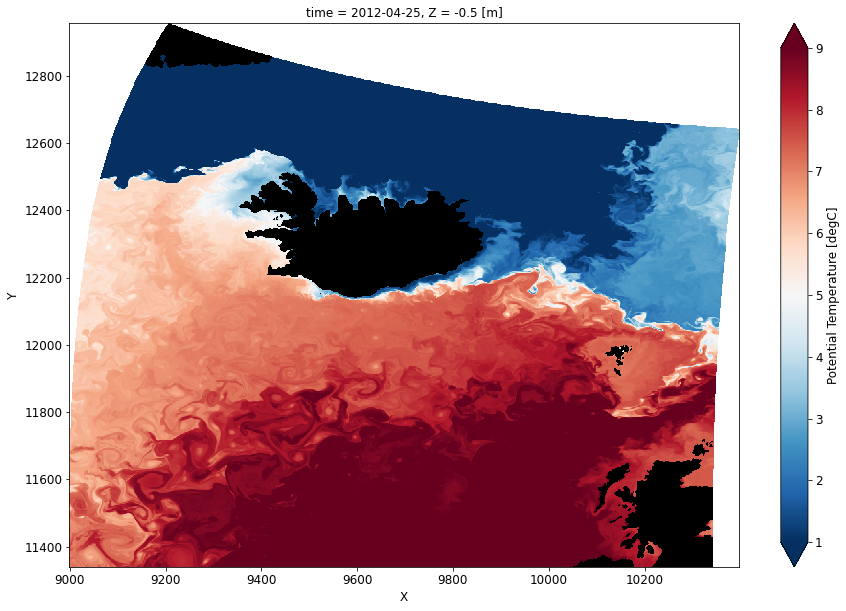

CPU times: user 3.32 s, sys: 1.1 s, total: 4.42 s
Wall time: 5.89 s


In [15]:
%%time
cut_od.dataset[_depth].isel(**harg).plot(cmap='Greys_r', vmin=0, vmax=1000, add_colorbar=False)
(cut_od.dataset[varName].isel(**iarg).where(cut_od._ds[_depth].isel(**harg)>0)).plot(cmap='RdBu_r', vmin=1, vmax=9)
plt.show()

# <span style='color:#009999'> <span style='font-family:serif'> **Without face as a dimension, we recover the full functionality of xgcm.grid, and we now interpolate**

In [16]:
grid = cut_od.grid
DepthG=grid.interp(grid.interp(cut_od._ds['Depth'], axis='X', boundary='extrapolate'), axis='Y', boundary='extrapolate')
DepthU=grid.interp(cut_od._ds['Depth'], axis='X', boundary='extrapolate')
DepthV=grid.interp(cut_od._ds['Depth'], axis='Y', boundary='extrapolate')
cut_od._ds['DepthG'] = DepthG
cut_od._ds['DepthU'] = DepthU
cut_od._ds['DepthV'] = DepthV

In [17]:
curl = ospy.compute.curl(cut_od, 'U', 'V')['dV_dX-dU_dY']
cut_od._ds['zeta'] = curl

Computing curl.


In [18]:
varName = 'zeta'
dims = Dims([dim for dim in cut_od._ds[varName].dims][::-1])
_depth = 'DepthG'

harg = {dims.X:slice(0, -1, 2), dims.Y:slice(0, -1, 2)}
iarg = {dims.Z:0, dims.T:0, dims.X:slice(0, -1, 2), dims.Y:slice(0, -1, 2)}

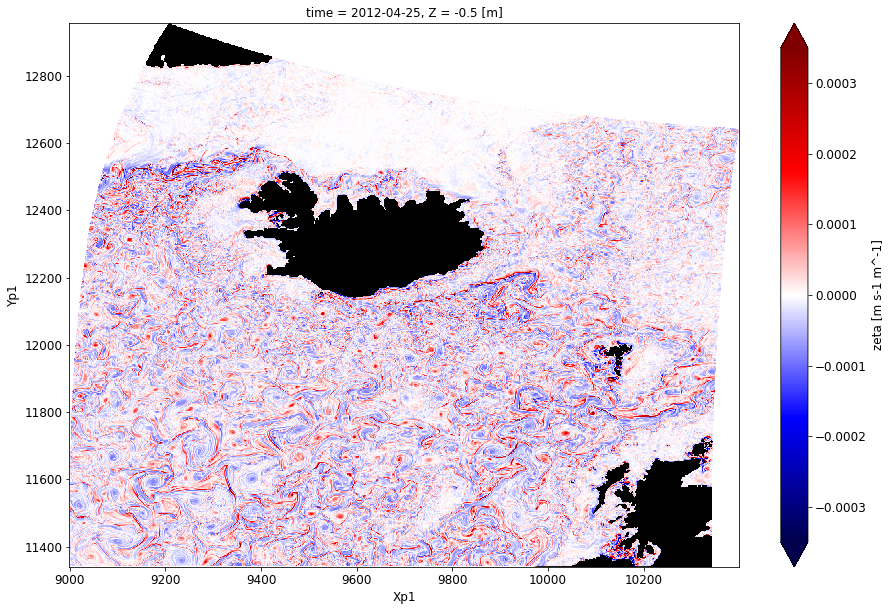

CPU times: user 6.49 s, sys: 1.18 s, total: 7.67 s
Wall time: 10.7 s


In [19]:
%%time
cut_od.dataset[_depth].isel(**harg).plot(cmap='Greys_r', vmin=0, vmax=1000, add_colorbar=False)
(cut_od.dataset[varName].isel(**iarg).where(cut_od._ds[_depth].isel(**harg)>0)).plot(cmap='seismic', vmin=-3.5e-4, vmax=3.5e-4)
plt.show()

# <span style='color:#009999'> <span style='font-family:serif'> **Making Vertical Section**

<font size="3">  In our Ocean group, we are generally interested in the subpolar North Atlantic region, with particular emphasis on the exchanges across the Greenland-Scotland Ridge (GSR). Hence, we will be making two sections:
    
<font size="3">    1.  An a long-ridge section that covers the <span style='color:#0066cc'> **Greenland Scotland Ridge (GSR)**, 

    
    
<font size="3">    2. An across ridge section, to inspect the hydrographic of the region. Due to limited observational data, we pick a section accross the <span style='color:#0066cc'> **Iceland Faroe Ridge (IFR).**

    

# <span style='color:#009999'> <span style='font-family:serif'> **Survey function within OceanSpy**

<font size="3"> We simply provide the lat-lon information to the `ospy.subsample.survey_station` function along with any other relevant information required, such as depth levels and the variables that need to be included in the analysis. 
    

In [20]:
%%time
Xsurv1       = [-30.2,-28.4,-24.3,-13.7,-7.1,-6.8,-2.95]
Ysurv1       = [68.2,66.7,65.6,65.05,62.3,61.45, 59.35]
ZRange       = [-1050, 0]
timeRange = '2012-05-04T00'  # one full day average

# Extract ship survey and fields used by this notebook
od_surv = cut_od.subsample.survey_stations(Xsurv=Xsurv1,
                                          Ysurv=Ysurv1,
                                          ZRange=ZRange,
                                          delta=2,
                                          timeRange = timeRange,
                                          varList=["Temp", "S", "U", "V"])

Cutting out the oceandataset.
Carrying out survey.
Variables to interpolate: ['S', 'Temp', 'U', 'V', 'XC', 'XG', 'YC', 'YG', 'YU', 'XU', 'YV', 'XV'].
Interpolating [S].
Interpolating [Temp].
Interpolating [U].
Interpolating [V].
Interpolating [XC].
Interpolating [XG].
Interpolating [YC].
Interpolating [YG].
Interpolating [YU].
Interpolating [XU].
Interpolating [YV].
Interpolating [XV].
CPU times: user 1min 50s, sys: 10.8 s, total: 2min 1s
Wall time: 2min 8s


In [21]:
%%time
Xsurv2       = [-10.95, -10.56, -9.93, -9.17, -8.76, -8.42, -7.69, -7., -6.38]
Ysurv2       = [62.11, 62.47, 62.73, 62.93, 63.29, 63.66, 63.9, 64.16, 64.46]
ZRange       = [-1050, 0]
timeRange = '2012-05-04T00'

# Extract ship survey and fields used by this notebook
od_surv2 = cut_od.subsample.survey_stations(Xsurv=Xsurv2,
                                            Ysurv=Ysurv2,
                                            ZRange=ZRange,
                                            delta=2,
                                            timeRange = timeRange,
                                            varList=["Temp", "S", "U", "V"])

Cutting out the oceandataset.
Carrying out survey.
Variables to interpolate: ['S', 'Temp', 'U', 'V', 'XC', 'XG', 'YC', 'YG', 'YU', 'XU', 'YV', 'XV'].
Interpolating [S].
Interpolating [Temp].
Interpolating [U].
Interpolating [V].
Interpolating [XC].
Interpolating [XG].
Interpolating [YC].
Interpolating [YG].
Interpolating [YU].
Interpolating [XU].
Interpolating [YV].
Interpolating [XV].
CPU times: user 7.2 s, sys: 670 ms, total: 7.87 s
Wall time: 25.2 s


In [22]:
# Print size
print("Size:")
print(" * Original dataset: {0:.1f} TB".format(od.dataset.nbytes * 1.0e-12))
print(" * Mooring along GRS dataset: {0:.1f} MB".format(od_surv.dataset.nbytes * 1.0e-6))
print(" * Mooring across GRS dataset: {0:.1f} MB".format(od_surv2.dataset.nbytes * 1.0e-6))

print()

Size:
 * Original dataset: 84.4 TB
 * Mooring along GRS dataset: 1.6 MB
 * Mooring across GRS dataset: 0.3 MB



In [23]:
cut_od = cut_od.set_projection('PlateCarree', central_longitude=-40)

CPU times: user 6.64 s, sys: 812 ms, total: 7.45 s
Wall time: 15.2 s


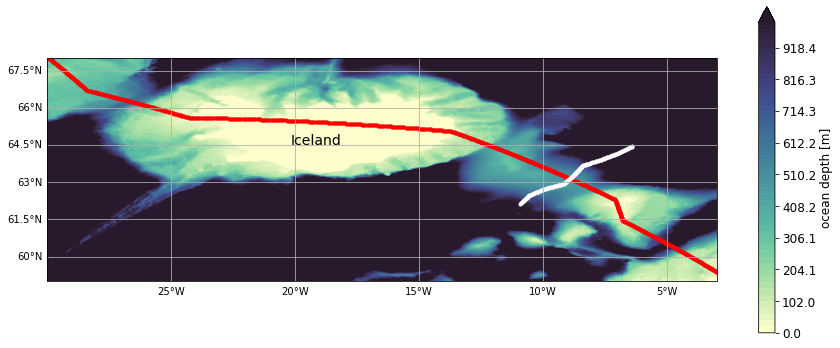

In [24]:
%%time
fig= plt.figure(figsize=(15, 6), frameon=True, facecolor='w')
ax = cut_od.plot.horizontal_section(varName="Depth",
                                    plotType='contourf',
                                    levels=np.linspace(0,1000,50),
                                    cmap = cmocean.cm.deep,
                                    use_coords=True)


XC_a1 = od_surv.dataset["XC"].squeeze()
YC_a1 = od_surv.dataset["YC"].squeeze()

XC_a2 = od_surv2.dataset["XC"].squeeze()
YC_a2 = od_surv2.dataset["YC"].squeeze()


ax.set_extent([np.round(Xsurv1[0]), np.round(Xsurv1[-1]), np.round(Ysurv1[0]), np.round(Ysurv1[-1])], crs=ccrs.PlateCarree())
a2_line = ax.plot(XC_a1, YC_a1, "r.", transform=ccrs.PlateCarree())
a1_line = ax.plot(XC_a2, YC_a2, 'w.', transform=ccrs.PlateCarree())

plt.figtext(0.35,0.56, 'Iceland', fontsize=14, color='k')

ax.patch.set_facecolor('grey')
# plt.savefig('GRS_depth_survey.png')

# <span style='color:#009999'> <span style='font-family:serif'> **Vizualize the along GSR Section**

Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.
Computing weighted_mean.
Computing weighted_mean.


/home/idies/miniconda3/envs/Oceanography/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/idies/miniconda3/envs/Oceanography/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/idies/miniconda3/envs/Oceanography/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/idies/miniconda3/envs/Oceanography/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


CPU times: user 28.4 s, sys: 4.26 s, total: 32.6 s
Wall time: 1min 58s


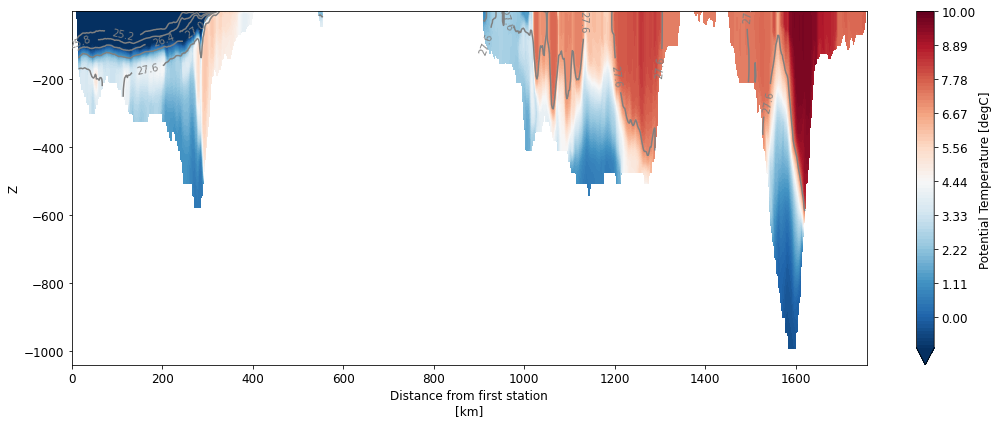

In [25]:
%%time
fig= plt.figure(figsize=(15, 6), facecolor='w')
ax = od_surv.plot.vertical_section(
    varName="Temp",
    plotType="contourf",
    levels=np.linspace(-1,10,100),
    contourName="Sigma0",
    meanAxes="time",
    robust=True,
    cmap="RdBu_r",
)
# plt.savefig('GRS_T_survey.png')

In [26]:
# fig= plt.figure(figsize=(15, 6), facecolor='w')
# ax = od_surv.plot.vertical_section(
#     varName="S",
#     plotType='contourf',
#     levels=np.linspace(30,36,100),
#     contourName="sigma",
#     meanAxes="time",
#     robust=True,
#     cmap=cmocean.cm.haline,
# )
# # plt.savefig('GRS_S_survey.png')

# <span style='color:#009999'> <span style='font-family:serif'> **Vizualize a section across the GSR**

Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.
Computing weighted_mean.
Computing weighted_mean.
CPU times: user 19.7 s, sys: 2.55 s, total: 22.2 s
Wall time: 1min 1s


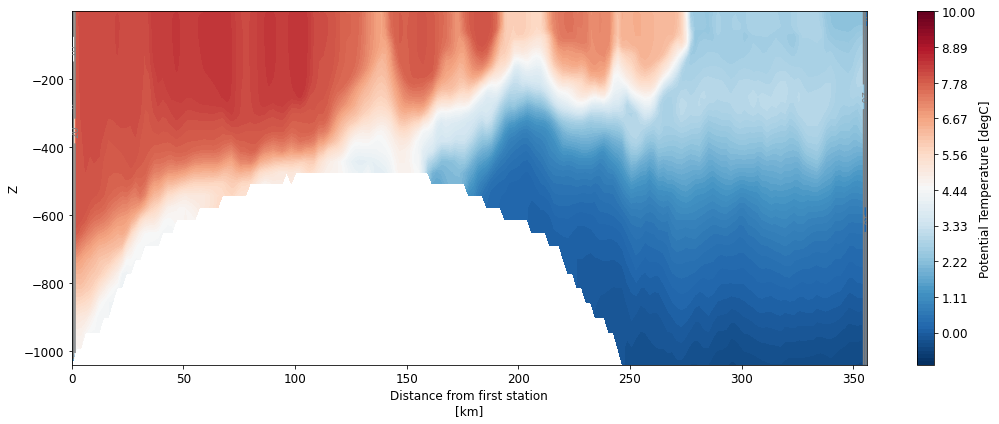

In [27]:
%%time

fig= plt.figure(figsize=(15, 6), facecolor='w')
ax = od_surv2.plot.vertical_section(
    varName="Temp",
    plotType="contourf",
    levels=np.linspace(-1,10,100),
    contourName="Sigma0",
    meanAxes="time",
    robust=True,
    cmap="RdBu_r",
)
# plt.savefig('GRS_T_survey.png')

# <span style='color:#009999'> <span style='font-family:serif'> **Compare against observations**

<font size="3"> This section is taken approximately along the path of the glider data collected in [Beaird et al (2013)](https://journals.ametsoc.org/view/journals/phoc/43/11/jpo-d-13-029.1.xml?tab_body=abstract-display), with their figure (No. 2) added below (note the variable is **not** potential temperature $T$ but instead potential density $\sigma_{0}$).

<img src="img/IFR_beaird2013_sigma.png" alt="drawing" width="750"/>


# <span style='color:#009999'> <span style='font-family:serif'> **Creating a**  <span style='color:Black'><ins> <span style='color:#CC0000'>**Checkpoint**<ins>


<font size="3"> A good and importance practice when dealing with large datasets is to create <ins><span style='color:#CC0000'>**checkpoints**<span style='color:Black'></ins>. In this case, after we have extracted the
relevant <span style='color:#0066CC'>**IFR**<span style='color:Black'> cross-ridge section, we can store locally the mooring array in **[Zarr](https://zarr.readthedocs.io/en/stable/)** or NetCDF format.

In [28]:
# %%time
# IFR_zarrname = "data/IFR_zarr"
# od_surv2.to_zarr(IFR_zarrname, mode='w')

In [29]:
# %%time
# # now open the locally stored survey data
# od_surv2 = ospy.open_oceandataset.from_zarr(IFR_zarrname)

# <span style='color:#0066cc'> <span style='font-family:serif'> **Transforming whole dataset lazily**  

<font size="3"> At the heart of this notebook, is the class <span style='color:#0066CC'>**LLCtransformation**<span style='color:black'> which transformes the dataset into one with simple topology, hence removing ```face``` as a dimension. You can use this directly on the dataset, in which you can transform the whole domain or only a subset of faces. Below we transform the whole domain for a subset of variables, without actually triggering the computation.

In [30]:
coord = ['Depth', 'XC', 'YC', 'XG', 'YG', 'Z', 'Zp1']
drop_list = [var for var in od._ds.coords if var not in coord and var not in od._ds.dims]
ds = od._ds.drop_vars(drop_list)
od._ds = ds

In [31]:
varlist = ['Temp', 'Depth', "S", 'U', 'V']  # By default, transforms all coords variables, but only data_vars define in varlist.
                                            # One can also define a set of faces that connect, and only those faces will be transformed.

In [32]:
%%time
DS = LLCtransformation.arctic_crown(od._ds, varlist, centered='Atlantic')

CPU times: user 1min 12s, sys: 7.29 s, total: 1min 20s
Wall time: 1min 17s


In [33]:
DS

<xarray.Dataset>
Dimensions:    (time: 240, Z: 90, Y: 15120, X: 17280, Yp1: 15120, Xp1: 17280,
                Zl: 90, Zp1: 91, Zu: 90, time_midp: 239)
Coordinates:
  * Y          (Y) int64 0 1 2 3 4 5 6 ... 15114 15115 15116 15117 15118 15119
  * X          (X) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * Yp1        (Yp1) int64 0 1 2 3 4 5 6 ... 15114 15115 15116 15117 15118 15119
  * Xp1        (Xp1) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * time       (time) datetime64[ns] 2012-04-25 ... 2012-05-04T23:00:00
  * Z          (Z) float64 -0.5 -1.57 -2.79 ... -5.882e+03 -6.301e+03 -6.76e+03
  * Zl         (Zl) float64 0.0 -1.0 -2.14 ... -5.682e+03 -6.082e+03 -6.52e+03
  * Zp1        (Zp1) float64 0.0 -1.0 -2.14 ... -6.082e+03 -6.52e+03 -7e+03
  * Zu         (Zu) float64 -1.0 -2.14 -3.44 ... -6.082e+03 -6.52e+03 -7e+03
  * time_midp  (time_midp) datetime64[ns] 2012-04-25T00:30:00 ... 2012-05-04T...
Data variables:
    Temp       (time, Z, Y, X) float32 dask.array<chunksize=(1, 1, 15120, 17280), meta=np.ndarray>
    Depth      (Y, X) float32 dask.array<chunksize=(15120, 17280), meta=np.ndarray>
    S          (time, Z, Y, X) float32 dask.array<chunksize=(1, 1, 15120, 17280), meta=np.ndarray>
    V          (time, Z, Yp1, X) float32 dask.array<chunksize=(1, 1, 15120, 17280), meta=np.ndarray>
    U          (time, Z, Y, Xp1) float32 dask.array<chunksize=(1, 1, 15120, 17280), meta=np.ndarray>
    Eta        (time, Y, X) float32 dask.array<chunksize=(1, 15120, 17280), meta=np.ndarray>
    XC         (Y, X) float32 dask.array<chunksize=(15120, 17280), meta=np.ndarray>
    XG         (Yp1, Xp1) float32 dask.array<chunksize=(15120, 17280), meta=np.ndarray>
    YC         (Y, X) float32 dask.array<chunksize=(15120, 17280), meta=np.ndarray>
    YG         (Yp1, Xp1) float32 dask.array<chunksize=(15120, 17280), meta=np.ndarray>
    niter      (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>